In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy import stats

import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('/Users/anwarouni/Downloads/Thesis/Data/Data_final.xlsx')

# Display first few rows to verify import
df.head()

,Date,Swap Spread,Credit_Risk,ECBrate,German_CPI YoY,Euribor-OIS,Yield_Slope,VSTOXX,German_UnemploymentRate
0,1999-12-31,0.4020,0.54,3.0,1.2,-0.011,2.305,31.10,10.3250
1,2000-01-07,0.4520,0.49,3.0,1.2,0.447,2.308,27.44,10.3125
2,2000-01-14,0.3705,0.62,3.0,1.2,0.316,2.439,25.48,10.3000
3,2000-01-21,0.3735,0.54,3.0,1.3,0.260,2.399,28.20,10.3000
4,2000-01-28,0.3450,0.53,3.0,1.4,0.236,2.205,29.02,10.3000


In [14]:
def check_stationarity(data):
    # Create a dictionary to store results
    results = {}
    
    # Get numerical columns only (exclude Date)
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    
    for column in numerical_cols:
        # Perform ADF test
        adf_test = adfuller(data[column].dropna())
        
        # Store results
        results[column] = {
            'ADF Statistic': adf_test[0],
            'p-value': adf_test[1],
            'Critical values': adf_test[4]
        }
        
    # Convert results to DataFrame
    results_df = pd.DataFrame.from_dict({k: v['p-value'] for k, v in results.items()}, 
                                      orient='index', 
                                      columns=['p-value'])
    
    # Add stationarity conclusion
    results_df['Is Stationary'] = results_df['p-value'] < 0.05
    
    # Sort by p-value
    results_df = results_df.sort_values('p-value')
    
    return results_df

# Run the analysis
stationarity_results = check_stationarity(df)
print("Stationarity Analysis Results:")
print(stationarity_results)

Stationarity Analysis Results:
                          p-value  Is Stationary
VSTOXX                   0.000214           True
Credit_Risk              0.002475           True
Swap Spread              0.033689           True
German_CPI YoY           0.049215           True
ECBrate                  0.078816          False
Yield_Slope              0.094350          False
Euribor-OIS              0.114543          False
German_UnemploymentRate  0.753512          False



ADF Test Results for VSTOXX:

No Constant:
ADF Statistic: -1.3663
p-value: 0.1596
AIC: -2402.6767
Critical values:
	1%: -2.5674
	5%: -1.9412
	10%: -1.6166

Constant:
ADF Statistic: -4.4794
p-value: 0.0002
AIC: -11214.9194
Critical values:
	1%: -3.4353
	5%: -2.8637
	10%: -2.5679

Constant + Trend:
ADF Statistic: -4.7078
p-value: 0.0007
AIC: -9681.6208
Critical values:
	1%: -3.9657
	5%: -3.4138
	10%: -3.1290

Best specification (lowest AIC): Constant
Conclusion: Stationary with Constant


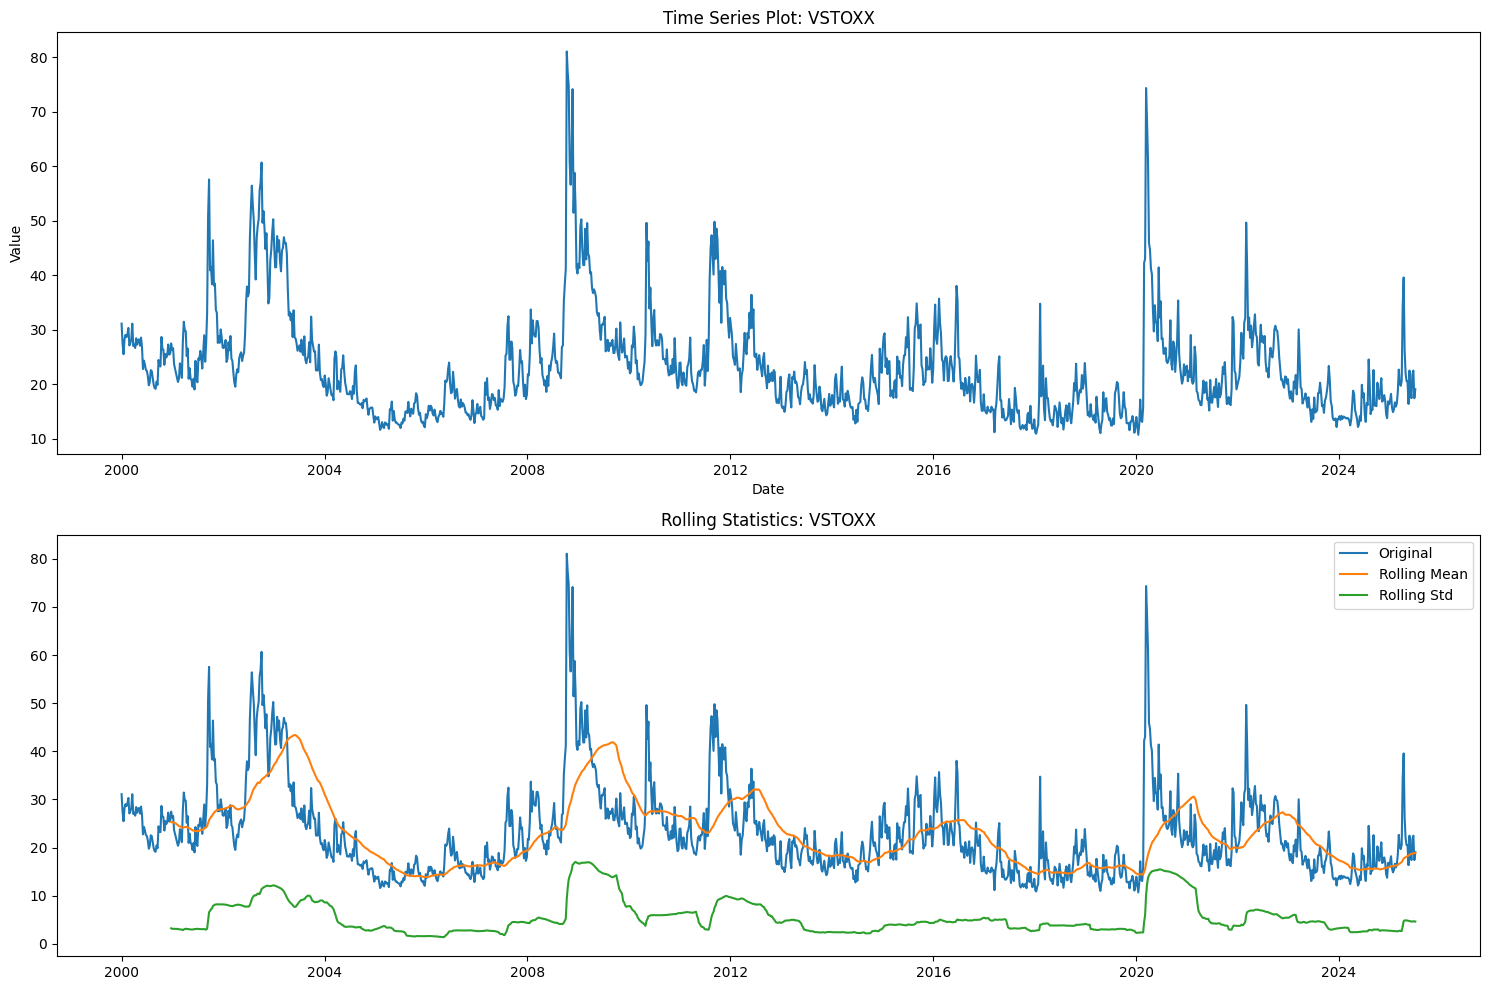


ADF Test Results for Swap Spread:

No Constant:
ADF Statistic: -1.6924
p-value: 0.0858
AIC: -3233.3517
Critical values:
	1%: -2.5674
	5%: -1.9412
	10%: -1.6166

Constant:
ADF Statistic: -3.0131
p-value: 0.0337
AIC: -4474.8612
Critical values:
	1%: -3.4353
	5%: -2.8637
	10%: -2.5679

Constant + Trend:
ADF Statistic: -3.0687
p-value: 0.1139
AIC: -2851.9053
Critical values:
	1%: -3.9657
	5%: -3.4138
	10%: -3.1290

Best specification (lowest AIC): Constant
Conclusion: Stationary with Constant


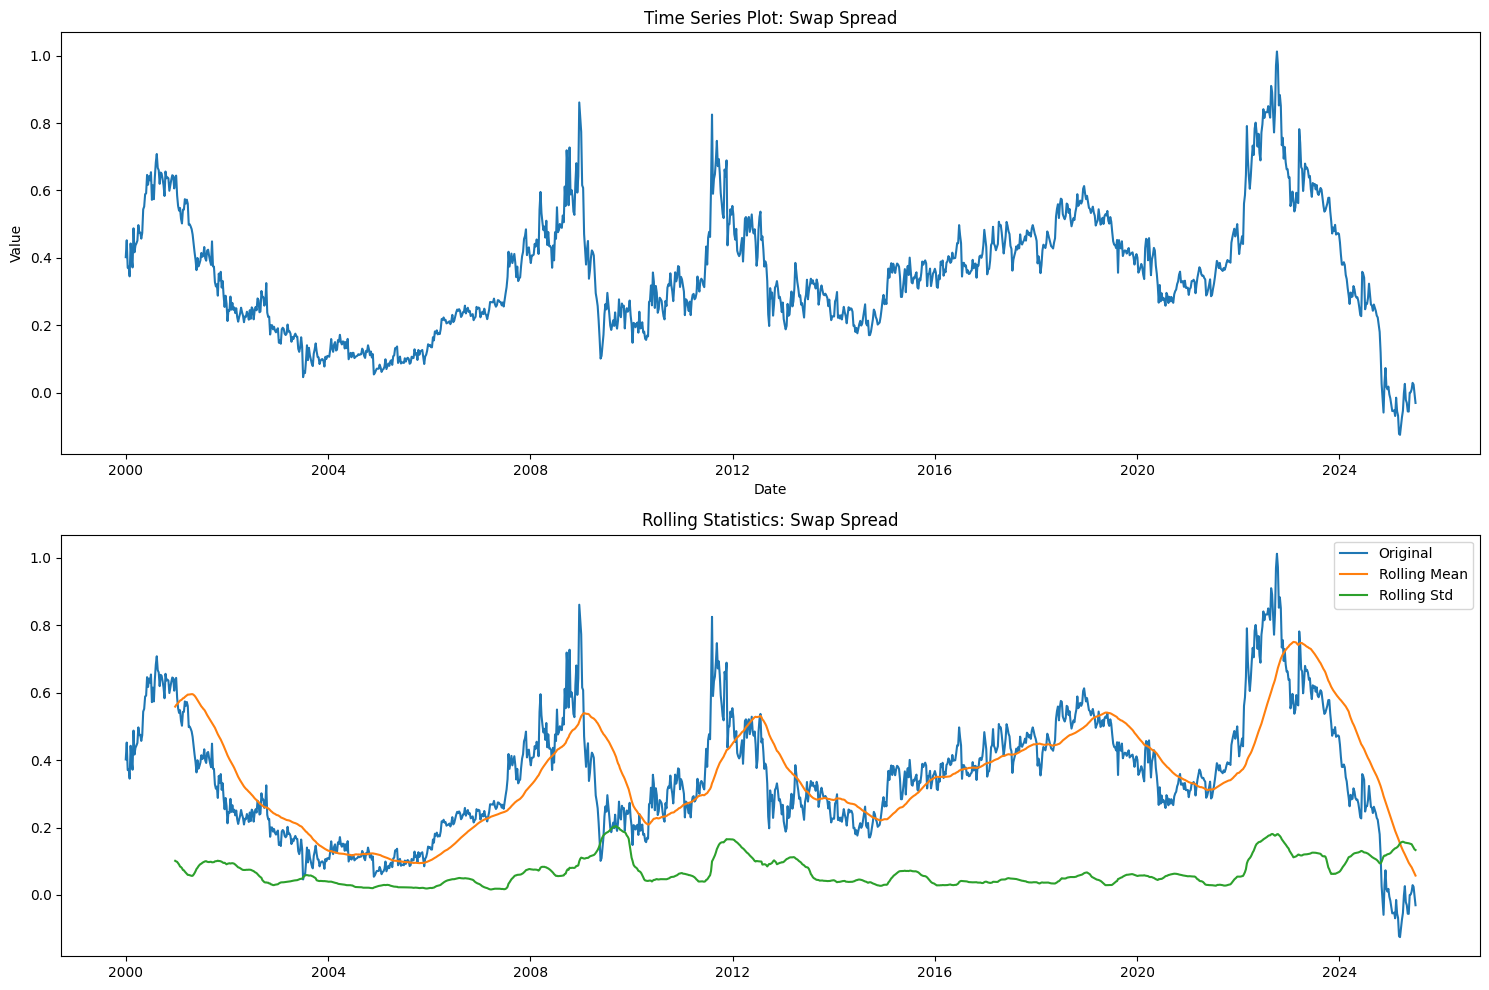


ADF Test Results for Credit_Risk:

No Constant:
ADF Statistic: -1.1834
p-value: 0.2162
AIC: -2028.2101
Critical values:
	1%: -2.5674
	5%: -1.9412
	10%: -1.6166

Constant:
ADF Statistic: -3.8455
p-value: 0.0025
AIC: -7968.2482
Critical values:
	1%: -3.4353
	5%: -2.8637
	10%: -2.5679

Constant + Trend:
ADF Statistic: -3.9511
p-value: 0.0103
AIC: -6067.5014
Critical values:
	1%: -3.9656
	5%: -3.4138
	10%: -3.1290

Best specification (lowest AIC): Constant
Conclusion: Stationary with Constant


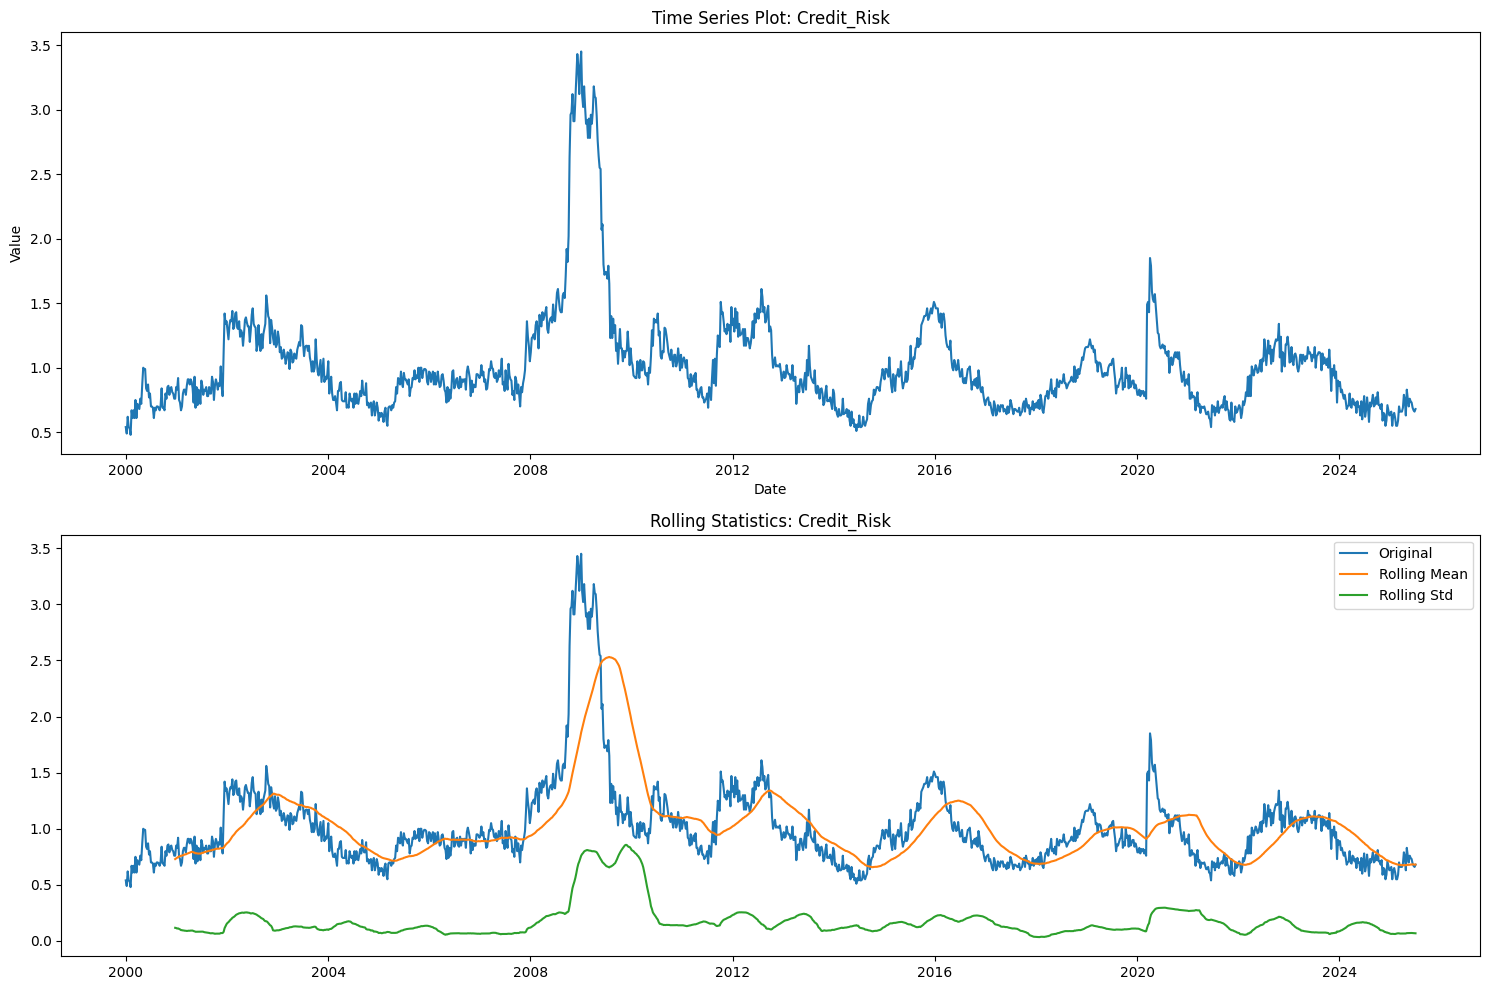


ADF Test Results for ECBrate:

No Constant:
ADF Statistic: -2.1193
p-value: 0.0327
AIC: -4523.7353
Critical values:
	1%: -2.5674
	5%: -1.9412
	10%: -1.6166

Constant:
ADF Statistic: -2.6731
p-value: 0.0788
AIC: -3349.5930
Critical values:
	1%: -3.4353
	5%: -2.8637
	10%: -2.5679

Constant + Trend:
ADF Statistic: -2.7157
p-value: 0.2296
AIC: -1924.2770
Critical values:
	1%: -3.9657
	5%: -3.4138
	10%: -3.1290

Best specification (lowest AIC): No Constant
Conclusion: Stationary


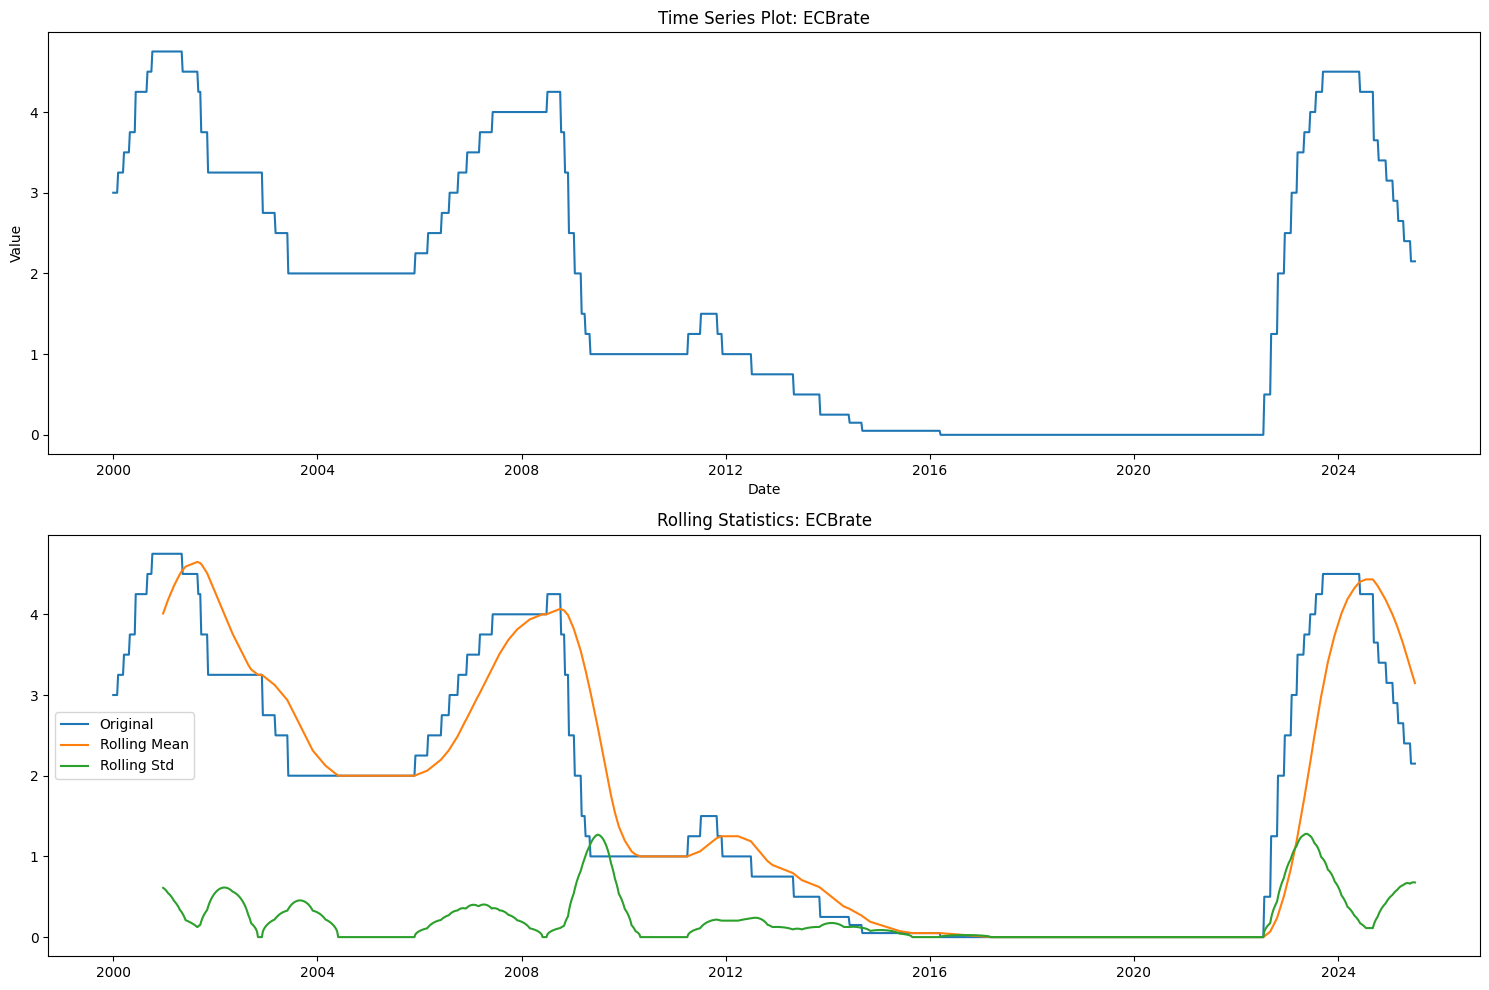


ADF Test Results for German_CPI YoY:

No Constant:
ADF Statistic: -1.6969
p-value: 0.0850
AIC: -3243.7062
Critical values:
	1%: -2.5674
	5%: -1.9412
	10%: -1.6166

Constant:
ADF Statistic: -2.8679
p-value: 0.0492
AIC: -3968.3771
Critical values:
	1%: -3.4353
	5%: -2.8637
	10%: -2.5679

Constant + Trend:
ADF Statistic: -2.9939
p-value: 0.1338
AIC: -2635.3622
Critical values:
	1%: -3.9657
	5%: -3.4138
	10%: -3.1290

Best specification (lowest AIC): Constant
Conclusion: Stationary with Constant


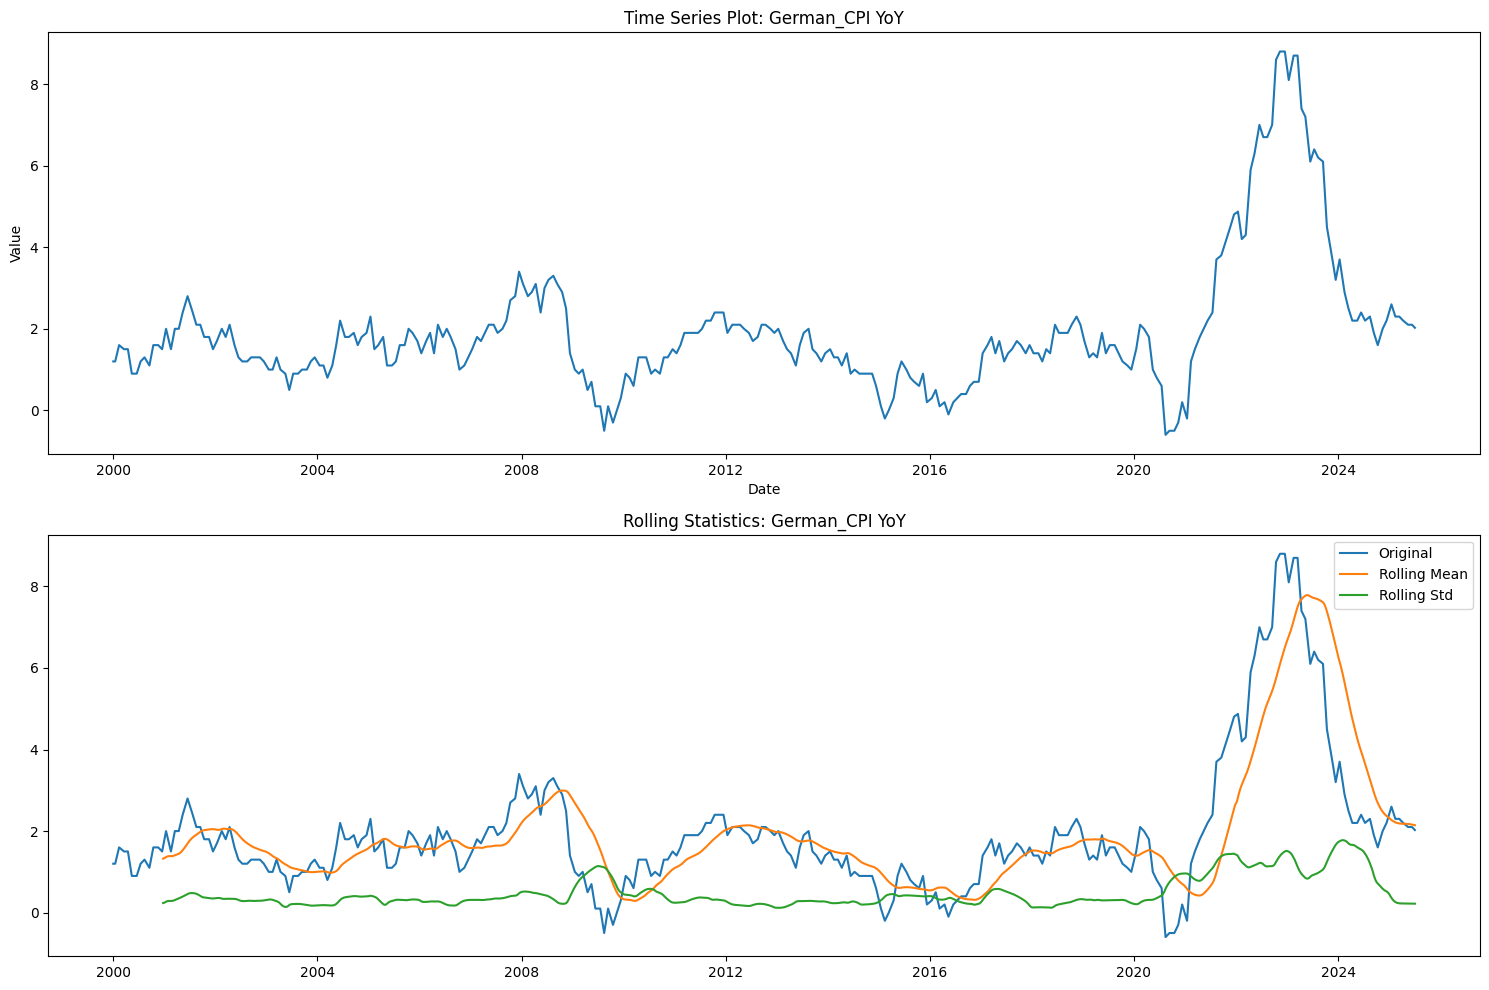


ADF Test Results for Euribor-OIS:

No Constant:
ADF Statistic: -2.1326
p-value: 0.0316
AIC: -4549.2543
Critical values:
	1%: -2.5675
	5%: -1.9412
	10%: -1.6166

Constant:
ADF Statistic: -2.5038
p-value: 0.1145
AIC: -2834.0120
Critical values:
	1%: -3.4354
	5%: -2.8638
	10%: -2.5679

Constant + Trend:
ADF Statistic: -2.5851
p-value: 0.2868
AIC: -1610.2844
Critical values:
	1%: -3.9657
	5%: -3.4139
	10%: -3.1290

Best specification (lowest AIC): No Constant
Conclusion: Stationary


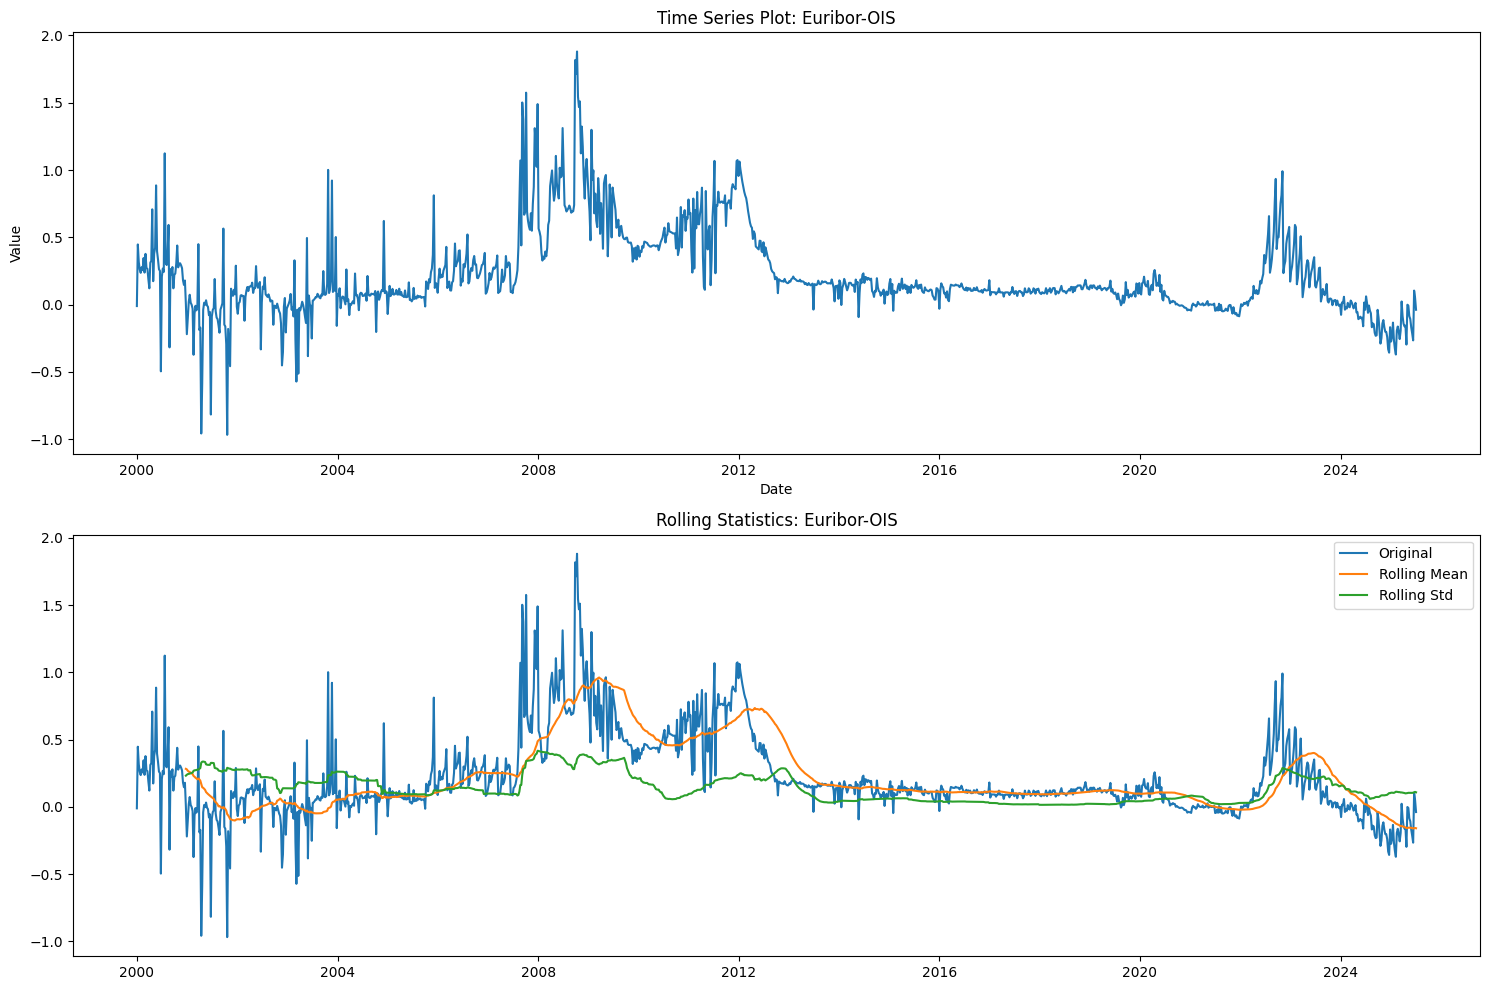


ADF Test Results for Yield_Slope:

No Constant:
ADF Statistic: -1.3285
p-value: 0.1704
AIC: -2315.5787
Critical values:
	1%: -2.5674
	5%: -1.9412
	10%: -1.6166

Constant:
ADF Statistic: -2.5935
p-value: 0.0943
AIC: -3100.1542
Critical values:
	1%: -3.4353
	5%: -2.8637
	10%: -2.5679

Constant + Trend:
ADF Statistic: -3.0174
p-value: 0.1273
AIC: -2699.5762
Critical values:
	1%: -3.9657
	5%: -3.4138
	10%: -3.1290

Best specification (lowest AIC): Constant
Conclusion: Not Stationary


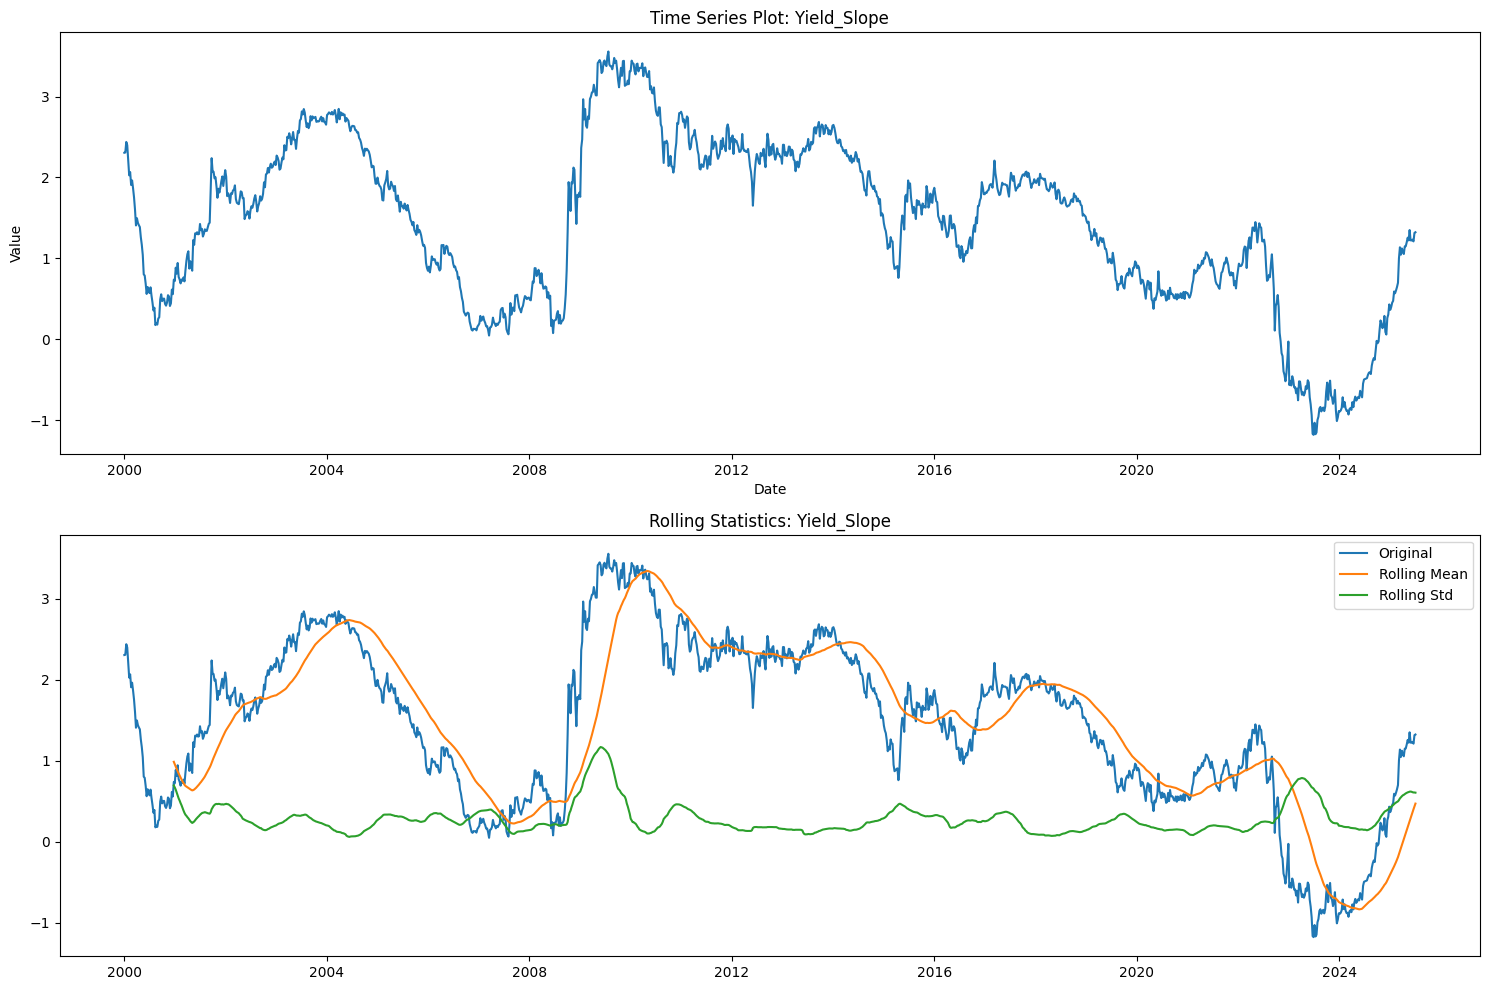


ADF Test Results for German_UnemploymentRate:

No Constant:
ADF Statistic: -0.9335
p-value: 0.3151
AIC: -1499.2832
Critical values:
	1%: -2.5674
	5%: -1.9412
	10%: -1.6166

Constant:
ADF Statistic: -0.9993
p-value: 0.7535
AIC: -336.6862
Critical values:
	1%: -3.4353
	5%: -2.8637
	10%: -2.5679

Constant + Trend:
ADF Statistic: -1.9076
p-value: 0.6507
AIC: -529.8961
Critical values:
	1%: -3.9657
	5%: -3.4138
	10%: -3.1290

Best specification (lowest AIC): No Constant
Conclusion: Not Stationary


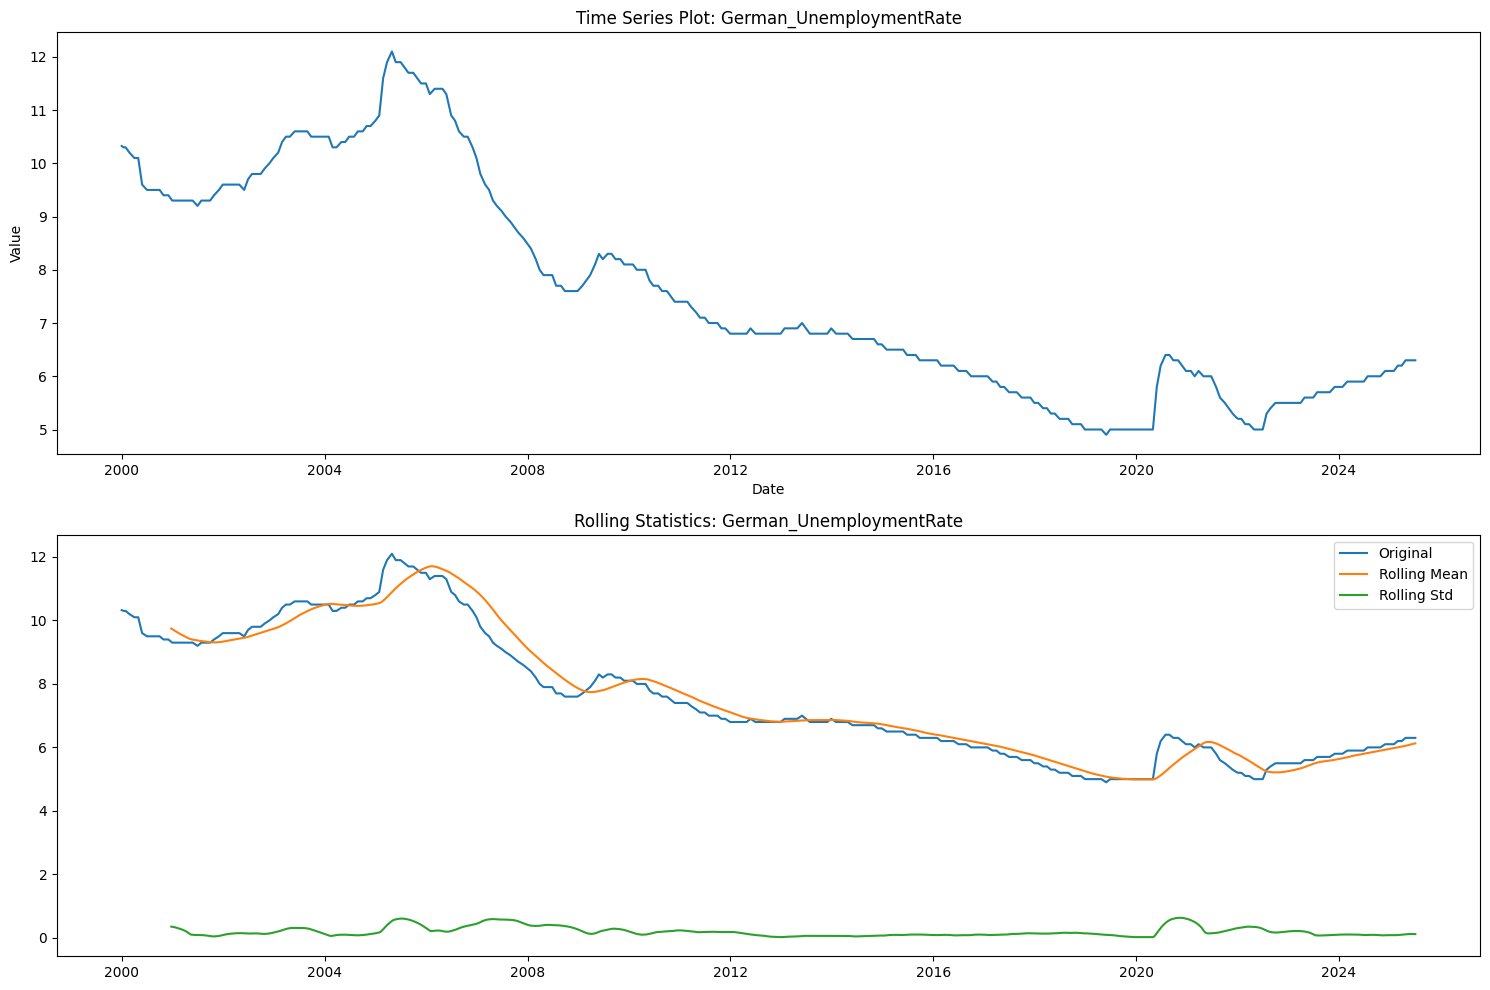


Summary of Conclusions:
VSTOXX: Stationary with Constant
Swap Spread: Stationary with Constant
Credit_Risk: Stationary with Constant
ECBrate: Stationary
German_CPI YoY: Stationary with Constant
Euribor-OIS: Stationary
Yield_Slope: Not Stationary
German_UnemploymentRate: Not Stationary


In [15]:
def analyze_stationarity(data, column):
    # Setup the plot
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot 1: Time series plot
    axes[0].plot(data['Date'], data[column])
    axes[0].set_title(f'Time Series Plot: {column}')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Value')
    
    # Plot 2: Rolling statistics
    rolling_mean = data[column].rolling(window=52).mean()
    rolling_std = data[column].rolling(window=52).std()
    
    axes[1].plot(data['Date'], data[column], label='Original')
    axes[1].plot(data['Date'], rolling_mean, label='Rolling Mean')
    axes[1].plot(data['Date'], rolling_std, label='Rolling Std')
    axes[1].set_title(f'Rolling Statistics: {column}')
    axes[1].legend()
    
    plt.tight_layout()
    
    # Run ADF tests with different specifications
    specifications = {
        'No Constant': 'n',
        'Constant': 'c',
        'Constant + Trend': 'ct'
    }
    
    print(f"\nADF Test Results for {column}:")
    print("=" * 50)
    
    results = {}
    conclusion = ""
    best_spec = None
    min_aic = float('inf')
    
    for name, regression in specifications.items():
        adf_result = adfuller(data[column].dropna(), regression=regression)
        # Calculate AIC
        nobs = len(data[column].dropna())
        k = 1 + (regression != 'n') + (regression == 'ct')  # parameters: intercept and trend
        aic = np.log(adf_result[1]) * nobs + 2 * (k + adf_result[2])  # AIC calculation
        
        results[name] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Critical values': adf_result[4],
            'Used Lags': adf_result[2],
            'AIC': aic
        }
        
        # Track best specification based on AIC
        if aic < min_aic:
            min_aic = aic
            best_spec = name
        
        print(f"\n{name}:")
        print(f"ADF Statistic: {adf_result[0]:.4f}")
        print(f"p-value: {adf_result[1]:.4f}")
        print(f"AIC: {aic:.4f}")
        print("Critical values:")
        for key, value in adf_result[4].items():
            print(f"\t{key}: {value:.4f}")
            
        # Determine stationarity type based on best AIC model
        if adf_result[1] < 0.05:
            if name == best_spec:
                if name == 'Constant + Trend':
                    conclusion = "Trend Stationary"
                elif name == 'Constant':
                    conclusion = "Stationary with Constant"
                else:
                    conclusion = "Stationary"
            
    if conclusion == "":
        conclusion = "Not Stationary"
        
    print(f"\nBest specification (lowest AIC): {best_spec}")
    print(f"Conclusion: {conclusion}")
    
    return results, conclusion

# Example usage for a few key variables
variables_to_check = ['VSTOXX', 'Swap Spread', 'Credit_Risk', 'ECBrate', 
                     'German_CPI YoY', 'Euribor-OIS', 'Yield_Slope',
                     'German_UnemploymentRate']
conclusions = {}
for var in variables_to_check:
    _, conclusions[var] = analyze_stationarity(df, var)
    plt.show()

print("\nSummary of Conclusions:")
print("=" * 50)
for var, conclusion in conclusions.items():
    print(f"{var}: {conclusion}")



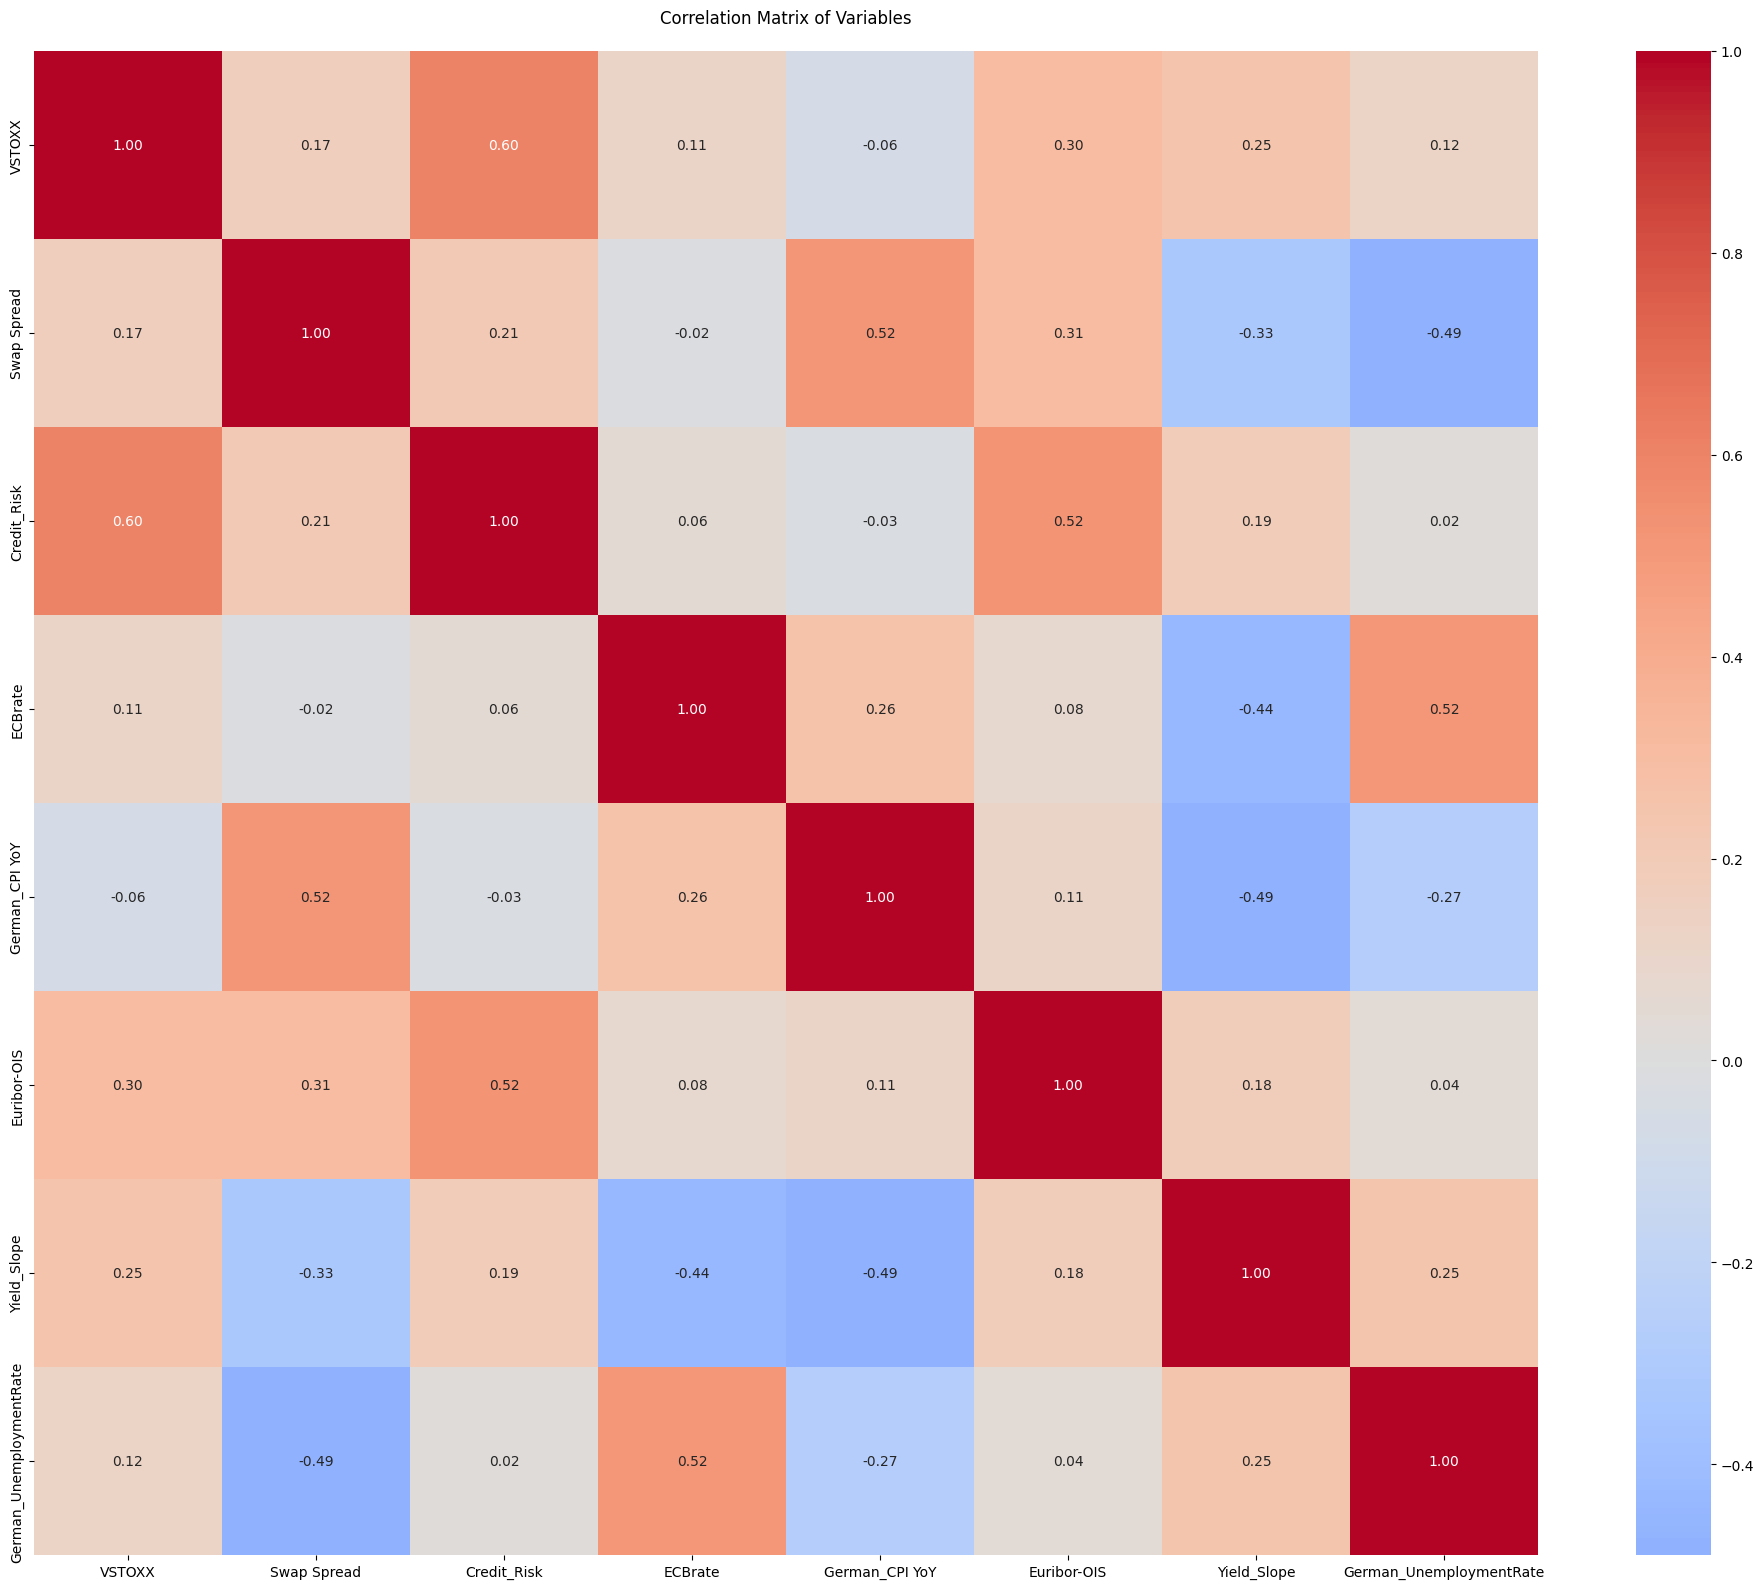

In [16]:
# Calculate correlation matrix with the variable list
corr_matrix = df[variables_to_check].corr()

# Create a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center the colormap at 0
            fmt='.2f',           # Format correlation values to 2 decimal places
            square=True)         # Make the plot square-shaped

plt.title('Correlation Matrix of Variables', pad=20)
plt.tight_layout()
plt.show()

In [17]:
# Filter correlations for Swap Spread
swap_spread_corr = corr_matrix['Swap Spread'].abs()
significant_corr = swap_spread_corr[swap_spread_corr > 0.1]
significant_corr = significant_corr.sort_values(ascending=False)

print("Variables correlated with Swap Spread (|correlation| > 0.1):")
for var, corr in significant_corr.items():
    if var != 'Swap Spread':  # Exclude self-correlation
        print(f"{var}: {corr_matrix['Swap Spread'][var]:.3f}")

Variables correlated with Swap Spread (|correlation| > 0.1):
German_CPI YoY: 0.519
German_UnemploymentRate: -0.486
Yield_Slope: -0.325
Euribor-OIS: 0.311
Credit_Risk: 0.209
VSTOXX: 0.168


In [19]:
# Identify non-stationary variables
non_stationary_vars = stationarity_results[~stationarity_results['Is Stationary']].index

# Take the first difference for non-stationary variables
df_diff = df.copy()
for var in non_stationary_vars:
    df_diff[var] = df_diff[var].diff()

# Drop the first row due to NaN values after differencing
df_diff = df_diff.dropna()

# Rerun stationarity tests for the differenced variables
stationarity_results_diff = check_stationarity(df_diff[non_stationary_vars])

print("Stationarity Analysis Results After Differencing:")
print(stationarity_results_diff)

Stationarity Analysis Results After Differencing:
                              p-value  Is Stationary
Euribor-OIS              5.312295e-15           True
Yield_Slope              1.826448e-09           True
German_UnemploymentRate  1.780049e-07           True
ECBrate                  5.969395e-05           True


In [20]:
# Remove the first row from the dataframe
df_aligned = df.iloc[1:].reset_index(drop=True)

# Show the number of values per column
print("Number of values per column:")
print(df_aligned.count())

# Display the first 5 rows of the new dataframe
print("\nFirst 5 rows of the new dataframe:")
print(df_aligned.head())

Number of values per column:
Date                       1330
Swap Spread                1330
Credit_Risk                1330
ECBrate                    1330
German_CPI YoY             1330
Euribor-OIS                1330
Yield_Slope                1330
VSTOXX                     1330
German_UnemploymentRate    1330
dtype: int64

First 5 rows of the new dataframe:
        Date  Swap Spread  Credit_Risk  ECBrate  German_CPI YoY  Euribor-OIS  \
0 2000-01-07       0.4520         0.49     3.00             1.2        0.447   
1 2000-01-14       0.3705         0.62     3.00             1.2        0.316   
2 2000-01-21       0.3735         0.54     3.00             1.3        0.260   
3 2000-01-28       0.3450         0.53     3.00             1.4        0.236   
4 2000-02-04       0.4425         0.48     3.25             1.5        0.278   

   Yield_Slope  VSTOXX  German_UnemploymentRate  
0        2.308   27.44                  10.3125  
1        2.439   25.48                  10.3000  
2  

In [21]:
# Write the dataframe to an Excel file
output_file = 'output_data.xlsx'
df.to_excel(output_file, index=False)

# Read back the Excel file to verify and summarize
df_summary = pd.read_excel(output_file)

# Display the first 5 rows and the columns
print(f"Data has been written to {output_file}")
print("\nSummary of the first 5 rows:")
print(df_summary.head())
print("\nColumns in the Excel file:")
print(df_summary.columns.tolist())


Data has been written to output_data.xlsx

Summary of the first 5 rows:
        Date  Swap Spread  Credit_Risk  ECBrate  German_CPI YoY  Euribor-OIS  \
0 1999-12-31       0.4020         0.54      3.0             1.2       -0.011   
1 2000-01-07       0.4520         0.49      3.0             1.2        0.447   
2 2000-01-14       0.3705         0.62      3.0             1.2        0.316   
3 2000-01-21       0.3735         0.54      3.0             1.3        0.260   
4 2000-01-28       0.3450         0.53      3.0             1.4        0.236   

   Yield_Slope  VSTOXX  German_UnemploymentRate  
0        2.305   31.10                  10.3250  
1        2.308   27.44                  10.3125  
2        2.439   25.48                  10.3000  
3        2.399   28.20                  10.3000  
4        2.205   29.02                  10.3000  

Columns in the Excel file:
['Date', 'Swap Spread', 'Credit_Risk', 'ECBrate', 'German_CPI YoY', 'Euribor-OIS', 'Yield_Slope', 'VSTOXX', 'German_Une

Plots

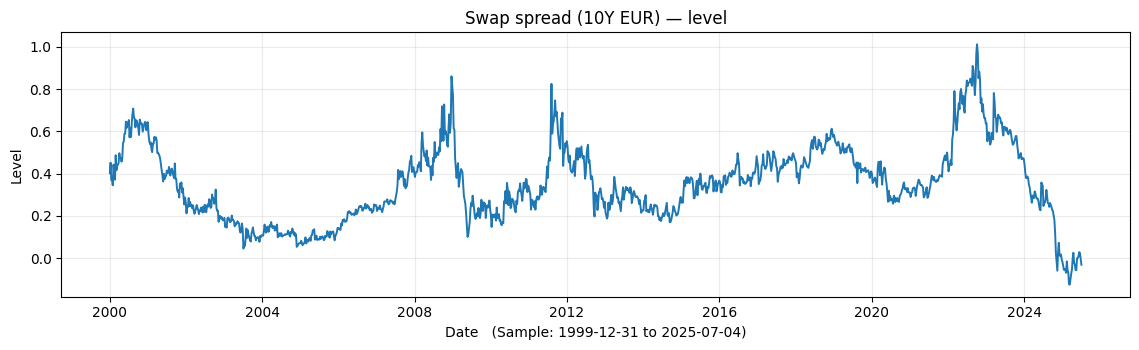

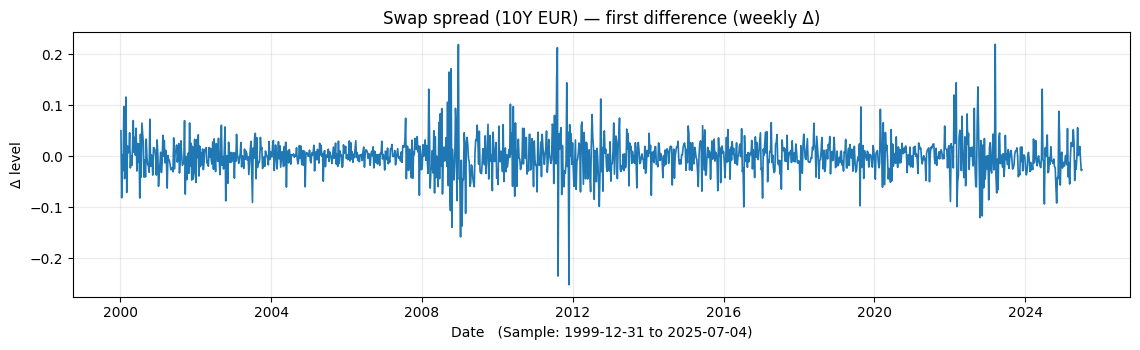

In [3]:
# --- Swap spread plots: (1) level, (2) first difference — on separate figures ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===================== CONFIG =====================
PATH_TO_EXCEL = "/Users/anwarouni/Downloads/Thesis/Code/output_data.xlsx"
DATE_COL      = "Date"
TARGET_COL    = "Swap Spread"

# If your series isn’t strictly weekly but you want weekly spacing, set True:
RESAMPLE_TO_WEEKLY = False
RESAMPLE_RULE      = "W-FRI"    # weekly (Friday)
# ==================================================

# ---- Load & prep ----
df = pd.read_excel(PATH_TO_EXCEL)

if DATE_COL in df.columns:
    df[DATE_COL] = pd.to_datetime(df[DATE_COL])
    df = df.sort_values(DATE_COL).set_index(DATE_COL)

y = df[TARGET_COL].astype(float).dropna()

if RESAMPLE_TO_WEEKLY:
    # keep last obs within each week; forward-fill if needed
    y = y.resample(RESAMPLE_RULE).last().ffill()

dy = y.diff().dropna()
sample_str = f"{y.index.min():%Y-%m-%d} to {y.index.max():%Y-%m-%d}"

# ---- Figure 1: levels ----
plt.figure(figsize=(11.5, 3.6))
plt.plot(y.index, y.values, linewidth=1.4)
plt.title("Swap spread (10Y EUR) — level")
plt.ylabel("Level")
plt.xlabel(f"Date   (Sample: {sample_str})")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

# ---- Figure 2: first difference ----
plt.figure(figsize=(11.5, 3.6))
plt.plot(dy.index, dy.values, linewidth=1.2)
plt.title("Swap spread (10Y EUR) — first difference (weekly Δ)")
plt.ylabel("Δ level")
plt.xlabel(f"Date   (Sample: {sample_str})")
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


In [4]:
# ===================== Summary table for data =====================
# Requires: pandas, numpy, scipy  (pip install pandas numpy scipy)

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# ---- CONFIG ----
PATH_TO_EXCEL = "/Users/anwarouni/Downloads/Thesis/Code/output_data.xlsx"
DATE_COL      = "Date"
TARGET_COL    = "Swap Spread"
EXOG_COLS     = [
    "Credit_Risk", "ECBrate", "German_CPI YoY", "Euribor-OIS",
    "Yield_Slope", "VSTOXX", "German_UnemploymentRate"
]
VAR_ORDER = [TARGET_COL] + EXOG_COLS

# Optional: show each series’ “native” frequency (for the LaTeX table notes)
FREQ_MAP = {
    "German_CPI YoY": "Monthly",
    "German_UnemploymentRate": "Monthly",
    # others are weekly in your dataset
}

# ---- Load & prep ----
df = pd.read_excel(PATH_TO_EXCEL)

if DATE_COL in df.columns:
    df[DATE_COL] = pd.to_datetime(df[DATE_COL])
    df = df.sort_values(DATE_COL)

# keep only columns we want (present in file)
cols = [c for c in VAR_ORDER if c in df.columns]
data = df[cols].copy()

# ---- Summary function ----
def summarize(series: pd.Series, total_rows: int) -> pd.Series:
    x = pd.to_numeric(series, errors="coerce").dropna()
    n_nonmiss = int(x.size)
    n_miss = int(total_rows - n_nonmiss)
    miss_pct = 100.0 * n_miss / max(1, total_rows)

    # Guard against empty series
    if n_nonmiss == 0:
        return pd.Series({
            "N": 0, "Mean": np.nan, "Std": np.nan, "Min": np.nan,
            "P25": np.nan, "Median": np.nan, "P75": np.nan, "Max": np.nan,
            "Skew": np.nan, "Ex.Kurt": np.nan, "Missing": n_miss,
            "Missing %": miss_pct
        })

    return pd.Series({
        "N": n_nonmiss,
        "Mean": x.mean(),
        "Std": x.std(ddof=1),
        "Min": x.min(),
        "P25": x.quantile(0.25),
        "Median": x.median(),
        "P75": x.quantile(0.75),
        "Max": x.max(),
        "Skew": skew(x, bias=False),
        "Ex.Kurt": kurtosis(x, fisher=True, bias=False),  # excess kurtosis
        "Missing": n_miss,
        "Missing %": miss_pct
    })

# ---- Build table ----
total_rows = len(data)
summary_df = data.apply(lambda s: summarize(s, total_rows), axis=0).T

# Optional: add a Frequency column (for information only)
summary_df.insert(0, "Frequency", [FREQ_MAP.get(var, "Weekly") for var in summary_df.index])

# Round for display
round_cols = ["Mean","Std","Min","P25","Median","P75","Max","Skew","Ex.Kurt","Missing %"]
summary_display = summary_df.copy()
summary_display[round_cols] = summary_display[round_cols].round(3)
summary_display["N"] = summary_display["N"].astype(int)
summary_display["Missing"] = summary_display["Missing"].astype(int)

print("\nSummary statistics (levels):")
print(summary_display)

# ---- LaTeX (booktabs) ----
latex = summary_display.to_latex(
    index=True, escape=True,  # escape underscores in names
    column_format="l l r r r r r r r r r r",
    caption="Summary statistics for the swap spread and exogenous variables (levels).",
    label="tab:data_summary",
    na_rep="",
    bold_rows=False
)
print("\n% ---------- LaTeX table ----------")
print(latex)

# Optionally save:
# with open("table_data_summary.tex", "w") as f:
#     f.write(latex)



Summary statistics (levels):
                        Frequency     N    Mean    Std     Min     P25  \
Swap Spread                Weekly  1331   0.350  0.179  -0.125   0.230   
Credit_Risk                Weekly  1331   1.010  0.405   0.480   0.770   
ECBrate                    Weekly  1331   1.702  1.603   0.000   0.050   
German_CPI YoY            Monthly  1331   1.919  1.605  -0.600   1.120   
Euribor-OIS                Weekly  1331   0.214  0.307  -0.968   0.055   
Yield_Slope                Weekly  1331   1.453  1.016  -1.180   0.724   
VSTOXX                     Weekly  1331  23.002  9.418  10.690  16.505   
German_UnemploymentRate   Monthly  1331   7.561  1.998   4.900   5.978   

                         Median     P75     Max   Skew  Ex.Kurt  Missing  \
Swap Spread               0.339   0.459   1.012  0.389    0.252        0   
Credit_Risk               0.920   1.130   3.450  3.102   13.053        0   
ECBrate                   1.250   3.250   4.750  0.444   -1.237        0   

In [5]:
# ================= Summary table with ADF-based Stationarity =================
# - Descriptives on LEVELS
# - Stationarity decided by ADF: first with constant ('c'); if not rejected,
#   try constant+trend ('ct'); else Non-stationary.

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# ---- CONFIG ----
PATH_TO_EXCEL = "/Users/anwarouni/Downloads/Thesis/Code/output_data.xlsx"
DATE_COL      = "Date"
TARGET_COL    = "Swap Spread"
EXOG_VARS     = [
    "Credit_Risk", "ECBrate", "German_CPI YoY", "Euribor-OIS",
    "Yield_Slope", "VSTOXX", "German_UnemploymentRate"
]
FREQ_MAP = {  # original data frequency
    "German_CPI YoY": "Monthly",
    "German_UnemploymentRate": "Monthly",
    TARGET_COL: "Weekly",
    "Credit_Risk": "Weekly",
    "ECBrate": "Weekly",
    "Euribor-OIS": "Weekly",
    "Yield_Slope": "Weekly",
    "VSTOXX": "Weekly",
}

# ---- Helpers ----
def adf_stationarity(series: pd.Series):
    x = series.dropna().astype(float).values
    if x.size < 20:
        return "Insufficient data", np.nan, np.nan
    # ADF with constant
    try:
        stat_c = adfuller(x, regression='c', autolag='AIC')
        p_c = stat_c[1]
    except Exception:
        p_c = np.nan
    if pd.notna(p_c) and p_c < 0.05:
        return "Stationary (c)", p_c, np.nan
    # ADF with constant + trend
    try:
        stat_ct = adfuller(x, regression='ct', autolag='AIC')
        p_ct = stat_ct[1]
    except Exception:
        p_ct = np.nan
    if pd.notna(p_ct) and p_ct < 0.05:
        return "Stationary (c+t)", p_c, p_ct
    return "Non-stationary", p_c, p_ct

def fmt(x, k=3):
    return f"{x:.{k}f}" if pd.notna(x) else ""

# ---- Load ----
df = pd.read_excel(PATH_TO_EXCEL)
if DATE_COL in df.columns:
    df[DATE_COL] = pd.to_datetime(df[DATE_COL])
    df = df.sort_values(DATE_COL).set_index(DATE_COL)

vars_all = [TARGET_COL] + EXOG_VARS
vars_present = [v for v in vars_all if v in df.columns]

rows = []
for v in vars_present:
    s = df[v].astype(float)
    N   = int(s.dropna().shape[0])
    mu  = s.mean()
    sd  = s.std(ddof=1)
    q1, med, q3 = s.quantile([0.25, 0.50, 0.75])
    vmin, vmax  = s.min(), s.max()
    skew = s.skew()
    kurt = s.kurt()  # excess kurtosis

    label, p_c, p_ct = adf_stationarity(s)
    rows.append({
        "Variable": v,
        "Frequency": FREQ_MAP.get(v, "Weekly"),
        "N": N,
        "Mean": mu, "Std. Dev.": sd,
        "Min": vmin, "Q1": q1, "Median": med, "Q3": q3, "Max": vmax,
        "Skew": skew, "Excess Kurt.": kurt,
        "Stationarity": label
    })

tab = pd.DataFrame(rows)

# Pretty preview
preview_cols = ["Variable","Frequency","N","Mean","Std. Dev.","Min","Q1","Median","Q3","Max","Skew","Excess Kurt.","Stationarity"]
print(tab[preview_cols].to_string(index=False,
      formatters={
          "Mean": fmt, "Std. Dev.": fmt, "Min": fmt, "Q1": fmt,
          "Median": fmt, "Q3": fmt, "Max": fmt, "Skew": fmt, "Excess Kurt.": fmt
      }))

# ---- LaTeX output ----
latex_tab = tab[preview_cols].to_latex(
    index=False,
    escape=False,
    float_format=lambda x: f"{x:.3f}",
    column_format="l l r r r r r r r r r r l",
    caption="Summary statistics and stationarity (ADF) for swap spread and exogenous variables (levels).",
    label="tab:data_summary_stationarity",
    bold_rows=False
).replace("toprule", "toprule").replace("midrule", "midrule").replace("bottomrule", "bottomrule")

# Add booktabs note block manually if you like:
notes = (
    "\\begin{flushleft}\\footnotesize "
    "Notes: Stationarity is assessed with the Augmented Dickey–Fuller test on levels. "
    "'Stationary (c)' indicates rejection at 5\\% with an intercept; "
    "'Stationary (c+t)' indicates rejection with intercept and linear trend; "
    "'Non-stationary' indicates failure to reject with either specification. "
    "Excess kurtosis is reported (zero for normal).\\end{flushleft}"
)
latex_full = latex_tab + "\n" + notes

print("\n" + latex_full)


               Variable Frequency    N   Mean Std. Dev.    Min     Q1 Median     Q3    Max   Skew Excess Kurt.   Stationarity
            Swap Spread    Weekly 1331  0.350     0.179 -0.125  0.230  0.339  0.459  1.012  0.389        0.252 Stationary (c)
            Credit_Risk    Weekly 1331  1.010     0.405  0.480  0.770  0.920  1.130  3.450  3.102       13.053 Stationary (c)
                ECBrate    Weekly 1331  1.702     1.603  0.000  0.050  1.250  3.250  4.750  0.444       -1.237 Non-stationary
         German_CPI YoY   Monthly 1331  1.919     1.605 -0.600  1.120  1.600  2.100  8.800  2.316        6.247 Stationary (c)
            Euribor-OIS    Weekly 1331  0.214     0.307 -0.968  0.055  0.124  0.307  1.881  1.406        3.777 Non-stationary
            Yield_Slope    Weekly 1331  1.453     1.016 -1.180  0.724  1.592  2.256  3.556 -0.337       -0.392 Non-stationary
                 VSTOXX    Weekly 1331 23.002     9.418 10.690 16.505 20.777 26.544 81.034  1.924        5.450 Station